# Cat Dog Classifier

## Build model

In [1]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(540, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])



model.compile(loss='binary_crossentropy', 
             optimizer= tf.keras.optimizers.RMSprop(lr=0.002),
             metrics=['accuracy'])

model.summary()
                           
                           

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [2]:
train_dir='cats_and_dogs_filtered/train'              #make sure the notebook and data should be stored
test_dir='cats_and_dogs_filtered/validation'          #in the same folder
train_cats_dir='cats_and_dogs_filtered/train/cats'
train_dogs_dir='cats_and_dogs_filtered/train/dogs'

In [3]:
import os
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [4]:
## rescale images

from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

traindata = IDG(rescale=1.0/255)
testdata= IDG(rescale=1.0/255)

train_generator = traindata.flow_from_directory(train_dir, 
                                                class_mode='binary',
                                                batch_size=20,
                                                target_size=(150,150))

validation_generator= testdata.flow_from_directory(test_dir, 
                                                  class_mode='binary',
                                                  batch_size=20,
                                                  target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
## fit model

history=model.fit_generator(train_generator,
                   steps_per_epoch=100,
                   validation_data= validation_generator,
                   validation_steps=50,
                   verbose=1,
                   epochs=15,
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - 110s 1s/step - loss: 0.9454 - accuracy: 0.5465 - val_loss: 0.7542 - val_accuracy: 0.5100
Epoch 2/15
100/100 [==============================] - 61s 610ms/step - loss: 0.6980 - accuracy: 0.6235 - val_loss: 0.6395 - val_accuracy: 0.6090
Epoch 3/15
100/100 [==============================] - 60s 603ms/step - loss: 0.6283 - accuracy: 0.6640 - val_loss: 0.6049 - val_accuracy: 0.6670
Epoch 4/15
100/100 [==============================] - 61s 606ms/step - loss: 0.5798 - accuracy: 0.7245 - val_loss: 0.5891 - val_accuracy: 0.6980
Epoch 5/15
100/100 [==============================] - 61s 606ms/step - loss: 0.5014 - accuracy: 0.7960 - val_loss: 0.6340 - val_accuracy: 0.7080
Epoch 6/15
100/100 [==============================] - 61s 605ms/step - loss: 0.4273 - accuracy: 0.8330 - val

##### It can be seen that the model is overfitted as the training accuracy keeps on increasing but the validation accuracy keeps fluctating around 68%. Better model can be generated by changing with learning rate(lr) or using image augmentation. ####

 File name, make sure file should be in same folder as notebook: dog.jpg
 dog


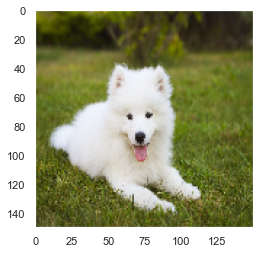

In [6]:
## visualize some results

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from tensorflow.keras.preprocessing import image
path=input(' File name, make sure file should be in same folder as notebook: ')

img1= image.load_img(path, target_size=(150,  150))
plt.grid(False)
plt.imshow(img1)
img= image.img_to_array(img1)
img= image.img_to_array(img)
image= img.reshape(1, 150, 150, 3)
classes= model.predict(image)


if classes[0]>0.5:
    print( " dog")
    
else:
    print( " cat")

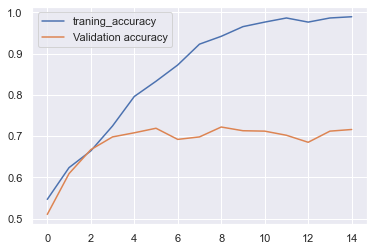

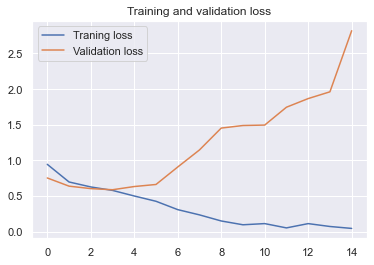

In [9]:
import seaborn as sns
sns.set()

acc=history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(len(acc))

plt.plot(epochs, acc, label='traning_accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.legend()
plt.figure()

plt.plot( epochs,     loss , label="Traning loss")
plt.plot( epochs, val_loss, label="Validation loss")
plt.title ('Training and validation loss'   )
plt.legend()
plt.show()